## Multilayer Perceptron
Multilayer perceptron (MLP) is a class of feed forward neural network and sometimes refer to networks composed of multiple layers of perceptrons. 

There are at least three layers of nodes in MLP: an input layer, a hidden layer and an output layer. The MLP consists of three or more layers (an input and an output layer with one or more hidden layers) of nonlinearly-activating nodes. Since MLPs are fully connected, each node in one layer connects with a certain weight $w_{ij}$ to every node in the following layer.
For the layers after input layer, every node is a neuron that uses a nonlinear activation function. MLP model use backpropagation for training, and it is a supervised learning technique.

#### Activation function
If a multilayer perceptron has a linear activation function in all neurons, that is, a linear function that maps the weighted inputs to the output of each neuron, then linear algebra shows that any number of layers can be reduced to a two-layer input-output model. In MLPs some neurons use a nonlinear activation function that was developed to model the frequency of action potentials, or firing, of biological neurons.

The two historically common activation functions are both sigmoids, and are described by <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/167e8b5c38130ec92a2771bc384658772f387d02" width="300"/> In recent developments of deep learning the rectifier linear unit (ReLU) is more frequently used as one of the possible ways to overcome the numerical problems related to the sigmoids. Here $y_{i}$ is the output of the ${\displaystyle i}$th node (neuron) and ${\displaystyle v_{i}}$ is the weighted sum of the input connections. 

#### Learning
Learning occurs in the perceptron by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result. This is an example of supervised learning, and is carried out through backpropagation, a generalization of the least mean squares algorithm in the linear perceptron. 

In fitting a neural network, backpropagation computes the gradient of the loss function with respect to the weights of the network for a single input–output example, and does so efficiently, unlike a naive direct computation of the gradient with respect to each weight individually. This efficiency makes it feasible to use gradient methods for training multilayer networks, updating weights to minimize loss; gradient descent, or variants such as stochastic gradient descent, are commonly used. The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule.

We can represent the degree of error in an output node ${\displaystyle j}$ in the ${\displaystyle nth}$ data point (training example) by ${\displaystyle e_{j}(n)=d_{j}(n)-y_{j}(n)}$, where ${\displaystyle d}$ is the target value and ${\displaystyle y}$ is the value produced by the perceptron. The node weights can then be adjusted based on corrections that minimize the error in the entire output, given by <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/41454c8f3507f945e99dc7e18e8225d1bb0830de" width="100"/>  Using gradient descent, the change in each weight is <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e775e1fd516ec50eaf45344d5429657686c6985c" width="150"/> where ${\displaystyle y_{i}}$ is the output of the previous neuron and ${\displaystyle \eta }$ is the learning rate, which is selected to ensure that the weights quickly converge to a response, without oscillations.

The derivative to be calculated depends on the induced local field ${\displaystyle v_{j}}$, which itself varies. It is easy to prove that for an output node this derivative can be simplified to <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/056be9bc7c738ade1a15914654576d0de972594b" width="150"/> where ${\displaystyle \phi ^{\prime }}$ is the derivative of the activation function described above, which itself does not vary. The analysis is more difficult for the change in weights to a hidden node, but it can be shown that the relevant derivative is <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a57fb40387f833ae8d731f78c04138ad2ce6890b" width="225"/> This depends on the change in weights of the ${\displaystyle k}$ nodes, which represent the output layer. So to change the hidden layer weights, the output layer weights change according to the derivative of the activation function, and so this algorithm represents a backpropagation of the activation function.

In class, we build a multilayered perceptron with a single input layer with $784$ input nodes, 2 hidden layers of arbitrary size, and $10$ output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 
<img src="https://miro.medium.com/proxy/1*eloYEyFrblGHVZhU345PJw.jpeg" width="500"/>
For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function elementwise. For notational convience, we let $a^0 = x$, where $x$ is the current input data into our network. For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$



---------------------

### In Class Example
---------------------

The first example we build is a four layers included input layer network. Because we have 784 input data in the first layer, we have 784 neurons in the input layer.Also we have 60 nodes in the two hidden layers, and since we have 10 classes, the last layer will need to have 10 nodes. The number of nodes in the hidden layers can be whatever you want.  

Our task is to classify handwritten digits from 0 to 9.  
In order to do this we will need the following libraries:

* [matplotlib](https://matplotlib.org/)
* [tensorflow](https://www.tensorflow.org/)
* [keras](https://keras.io/) We need to import keras to access the dataset because the dataset is in keras, and that is the only time we will be using keras in this notebook; we will not use other functions under keras to build the network.
* [numpy](https://numpy.org/)

Import libraries and dataset from keras

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#### Dataset information
The [MNIST dataset](https://keras.io/api/datasets/mnist/) consists of $70000$  28x28 grayscale images of hand written digits, $60000$ of which are typically used as labeled training examples, where the other $10000$ are used for testing your learning model on. The following picture represent a sample of some of the images.
<img src="https://miro.medium.com/max/1168/1*2lSjt9YKJn9sxK7DSeGDyw.jpeg" width="500"/>



Each image in the MNIST data set is stored as a matrix. And every pixel values range from 0 to 255


check the shape, we have 60000 matrix (pictures) with 28 by 28 pixel

In [2]:
train_X.shape

(60000, 28, 28)

check the shape, we have 60000 pictures so 60000 numbers (labels)

In [3]:
train_y.shape

(60000,)

Visualize the picture

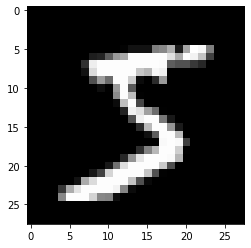

In [4]:
plt.imshow(train_X[0], cmap="gray")

check the range of train_X for each picture. Max is 225 min is 0 

In [5]:
np.min(train_X),np.max(train_X)

(0, 255)

scale each picture's pixel so that it prevents exploding during training

In [6]:
train_X = train_X/255
test_X = test_X/255

we want to flat X so that it changes from the matix (picture shape) to a list of number
we now check the flatten function first and the shape

In [7]:
train_X[0].flatten().shape

(784,)

now we want to reshape it into (784,1) : change to a vector with 784 rows and 1 col

In [8]:
train_X[0].flatten().reshape(784, 1).shape

(784, 1)

remember y_train is just the label number corresponding to each picture.Aassign the right row corresponding to the label number to 1 to make one hot encoded, so we need to get into the number itself first instead of array, and then we can assign 1

In [9]:
# X will temp store flattened matrices
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]

we have 60000 rows and two other cols one for pixel value the other for one hot encoded label

In [10]:
p = train_data[0]
np.array(train_data).shape 
p[0].shape
print(p[1])
print(train_y[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
5


C:\Users\c\AppData\Local\Temp/ipykernel_20328/2494387256.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(train_data).shape


the same operation for test data

In [11]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

Define activation function (sigmoid), derivative of sigmoid, and MSE.

In [12]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

# get the derivative of sigmoid
def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

# a is the predicted probabilty for each possible class label
def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]
  

Setup initializers weights and bias

In [13]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  # weight dim (60,784) (60,60) (10,60);  bias dim (60,1) (60,1) (10,1)
  # range(1, len(layers) not included len(layers)
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In [14]:
W, B = initialize_weights()

Test feedforward

In [15]:
x, y = train_data[0]

In [16]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

fist layer output

In [17]:
a1.shape

(60, 1)

2nd layer output

In [18]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


last layer output

In [19]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


Record hidden layers and output layer output

In [20]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

Write and record Delta which is the term that remains the same for each gradient descent

In [21]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1]) # (predict-ture)*sigmoid prime
deltas[L-1] = delta_last

In [22]:
deltas[L-1]

array([[ 0.14585446],
       [ 0.1323334 ],
       [ 0.10667142],
       [ 0.12617306],
       [ 0.11107781],
       [-0.07099325],
       [ 0.10562972],
       [ 0.13738977],
       [ 0.14814336],
       [ 0.14073522]])

last layer delta*corresponding weight*sigmoid prime for the layer

In [23]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l]) 

Set learning rate alpha

In [24]:
alpha = 0.04

gradient descent

In [25]:
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

Define feedforward process and delta terms

In [26]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]] #the first train_X
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

Define MSE

In [27]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)

See initial cost

In [28]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.499725656571191


See if our prediction is correct. No it is not.

Predicted Value = 1
Actual Value = 6


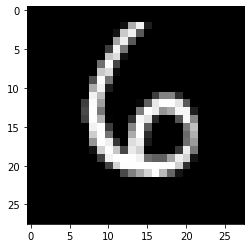

In [29]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

Define stochastic gradient descent

In [30]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"Cost at step {k} = {MSE(W, B, data)}")

Train with stochastic gradient descent

In [31]:
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 1.499725656571191
Cost at step 0 = 0.0747808289089981
Cost at step 1 = 0.053160474582893524
Cost at step 2 = 0.04223445399843722


After training, we see if our prediction is correct. Yes it is.

Predicted Value = 1
Actual Value = 1


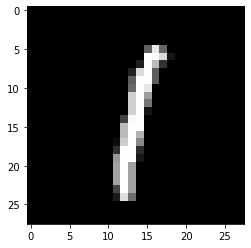

In [32]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

#### Batch Gradient Descent, Stochastic Gradient Descent, and Mini Batch Gradient Descent
* **Batch Gradient Descent**
In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.    


* **Stochastic Gradient Descent**
In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step. We do the following steps in one epoch for SGD:
1. Take an example
2. Feed it to Neural Network
3. Calculate it’s gradient
4. Use the gradient we calculated in step 3 to update the weights
5. Repeat steps 1–4 for all the examples in training dataset  
Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations. SGD can be used for larger datasets. It converges faster when the dataset is large as it causes updates to the parameters more frequently.   

Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets.

* **Mini Batch Gradient Descent**
We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. So, after creating the mini-batches of fixed size, we do the following steps in one epoch:
1. Pick a mini-batch
2. Feed it to Neural Network
3. Calculate the mean gradient of the mini-batch
4. Use the mean gradient we calculated in step 3 to update the weights
5. Repeat steps 1–4 for the mini-batches we created

Now we put everything together in a class

In [33]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")


  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
      for j in range(0, data_length-batch_size, batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j+batch_size]:
          A, deltas = self.deltas_dict(p)
          delta_list.append(deltas)
          A_list.append(A)

        for i in range(1, self.L):
          self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
          self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

Setup 60 nodes in both hidden layers

In [34]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10])

Use stochastic gradient descent

In [35]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.3860286281030807
2 Cost = 0.041197465999243454


Mini batch

In [36]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.041197465999243454
2 Cost = 0.03695976783035487


In [37]:
net.MSE(test_data)

0.039466441109262

Increase node in hidden layers

In [38]:
net = MultilayerPerceptron(layers=[784, 120, 120, 10])

In [39]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.165598656494287
2 Cost = 0.04411404028937365


In [40]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.04411404028937365
2 Cost = 0.03910231769848193


In [41]:
net.MSE(test_data)

0.04068733847909721

Mini batch gradient descent has smaller loss, and there are not too much different after we increase the number of nodes in the hidden layers.

-------------------------------

### Implementation on Different Dataset
---------------------

#### Dataset Information
The dataset we will be using is [Fashion MNIST dataset](https://keras.io/api/datasets/fashion_mnist/). We can load the dataset from keras.

* The dataset has 60,000 training data with 28x28 grayscale images
* 10,000 test images
* Data are labeled over 10 categories
* This pixel depth allows 255 different intensities, with 0 being black and 255 being white
* The classes are: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot with labels 0 to 9 respectively. 

The libraries we will be using are:
* [matplotlib](https://matplotlib.org/)
* [tensorflow](https://www.tensorflow.org/)
* [keras](https://keras.io/) We need to import keras to access the dataset because the dataset is in keras, and that is the only time we will be using keras in this notebook; we will not use other functions under keras to build the network.
* [numpy](https://numpy.org/)

Load libraries and dataset

In [42]:
from tensorflow import keras # to load the data
import numpy as np
import matplotlib.pyplot as plt

# from keras.datasets import fashion_mnist

from keras.datasets import fashion_mnist

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

check the shape of train_X. We have 60000 training pictures each with 28 by 28 pixel and grayscale

In [43]:
#check the shape of train_X. We have 60000 training pictures each with 28 by 28 pixel and grayscale
train_X.shape

(60000, 28, 28)

check the first training image dimension: it is a natrix with 28 by 28 dim, and it makes sense because it has 28 by 28 pixel
train_X[0].shape

In [44]:
#check the first training image dimension: it is a natrix with 28 by 28 dim, and it makes sense because it has 28 by 28 pixel
train_X[0].shape

(28, 28)

check the first label for train_y: the first picture has label 9, and so it correspond to Ankle boot

In [45]:
#check the first label for train_y: the first picture has label 9, and so it correspond to Ankle boot
train_y[0]

9

visualize the first image by putting the pixel together, and it is an Ankle boot

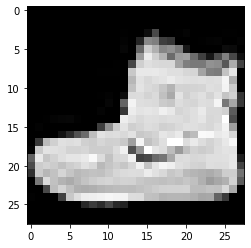

In [46]:
#visualize the first image by putting the pixel together, and it is an Ankle boot
plt.imshow(train_X[0], cmap="gray")

check the train_X range: it has min=0 and max=255. Because grayscale image has 0 to 255 values for each pixel to represent the intension of brightness, 0 represents black and 255 represents white.

In [47]:
# check the train_X range: it has min=0 and max=255. Because grayscale image has 0 to 255 values for each pixel to represent the intension of brightness, 0 represents black and 255 represents white.
np.min(train_X),np.max(train_X)

(0, 255)

we want to scale the X first by their brightness intension to prevent explosion during training 

In [48]:
# we want to scale the X first by their brightness intension to prevent explosion during training 
train_X = train_X/255
test_X = test_X/255

also check the dim for the first test_X, and it is also 28 by 28

In [49]:
# also check the dim for the first test_X, and it is also 28 by 28
test_X[0].shape

(28, 28)

We want to change the matrix shape to a vector to feed into the network, so let's try to flatten the first train_X and see its dim, so we know what does it looks like

In [50]:
#We want to change the matrix shape to a vector to feed into the network, so let's try to flatten the first train_X and see its dim, so we know what does it looks like
train_X[0].flatten().shape

(784,)

next we reshape it to (784,1) which is a vector (28x28=784)

In [51]:
#next we reshape it to (784,1) which is a vector (28x28=784)
train_X[0].flatten().reshape(784, 1).shape

(784, 1)

Now we are ready to flatten the X matrix. Make a list first and then store the flatten vetors into it. And we also make the y to one hot encoded label vectors; we make a list and store the vectors into it.

In [52]:
# Now we are ready to flatten the X matrix. Make a list first and then store the flatten vetors into it. And we also make the y to one hot encoded label vectors; we make a list and store the vectors into it.
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]

set p as the first train data including X and y. p[0] is X, and p[1] is y all for training  

In [53]:
#set p as the first train data including X and y. p[0] is X, and p[1] is y all for training  
p = train_data[0]

check y value for the first train data 

In [54]:
# check y value for the first train data 
print(p[1])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


check X dim for the first train data: it is a vector with 784 rows

In [55]:
# check X dim for the first train data: it is a vector with 784 rows
p[0].shape

(784, 1)

check dim of train data, 60000 input with X and y

In [56]:
#check dim of train data, 60000 input with X and y
np.array(train_data).shape

C:\Users\c\AppData\Local\Temp/ipykernel_20328/999522853.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(train_data).shape


(60000, 2)

the same method to deal with test data

In [57]:
# the same method to deal with test data
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

#### We introduce three types of activation functions: sigmoid, tanh, and Relu 
* A sigmoid function have a characteristic "S"-shaped curve or sigmoid curve. And its output values are constrained between 0 and 1. When the z value equal 0, the output value will equal to 0.5.
<table><tr>
<td> <img src="https://miro.medium.com/max/700/1*a04iKNbchayCAJ7-0QlesA.png" width="500"/> </td>
<td> <img src="https://i.stack.imgur.com/ulslG.png" width="200"/> </td>
</tr></table>

* Hyperbolic tangent activation function is also referred to as the Tanh. It is very similar to the sigmoid activation function and even has the same S-shape.
The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.
<table><tr>
<td> <img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png" width="400"/> </td>
<td> <img src="https://64.media.tumblr.com/3025e3dbafdb688bf0ca951628be912e/tumblr_inline_nt2ci2P4Wa1qzd4wm_400.gifv" width="300"/> </td>
</tr></table>


* The rectified linear activation function (ReLU) is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
<table><tr>
<td> <img src="https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png" width="400"/> </td>
<td> <img src="https://sebastianraschka.com/images/faq/relu-derivative/deriv-7.png" width="200"/> </td>
</tr></table>


now we build a function for our activation function sigmoid, and its derivative. Also build a function for the loss function MSE. sigoind_prime is the first derivative of sigmoid function

In [58]:
# now we build a function for our activation function sigmoid, and its derivative. Also build a function for the loss function MSE. sigoind_prime is the first derivative of sigmoid function
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))


def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]


next we setup the initialized weights for the layers. Because we have 784 input data in the first layer, we have 784 neurons in the input layer.Also we have 60 nodes in the two hidden layers, and since we have 10 classes, the last layer will need to have 10 nodes. The number of nodes in the hidden layers can be whatever you want. 

In [59]:
#next we setup the initialized weights for the layers. Because we have 784 input data in the first layer, we have 784 neurons in the input layer.Also we have 60 nodes in the two hidden layers, and since we have 10 classes, the last layer will need to have 10 nodes. The number of nodes in the hidden layers can be whatever you want. 
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]] #W = [[0,0],W1,W2,W3], placeholder
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1]) 
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

store W and B

In [60]:
W, B = initialize_weights() #store W and B

In [61]:
x, y = train_data[0]

set a0 as our original input data, z1 as linear combination of the weight and input, and a1 as the z1 value after activation function

In [62]:
# set a0 as our original input data, z1 as linear combination of the weight and input, and a1 as the z1 value after activation function
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [63]:
a1.shape

(60, 1)

so a1 will become the new input for the next layer, and we repeat it again

In [64]:
#so a1 will become the new input for the next layer, and we repeat it again
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


same thing for the next layer

In [65]:
#same thing for the next layer
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


now put everything together and feed forward

In [66]:
#now put everything together and feed forward
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)


check the shape for output layer

In [67]:
A[-1].shape #output layer

(10, 1)

Next we build a dictionary to stores the delta values for backporp
we first calculate the delta for the last layer

In [68]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [69]:
deltas[L-1]

array([[ 0.14413905],
       [ 0.14524268],
       [ 0.14662406],
       [ 0.1318953 ],
       [ 0.12228555],
       [ 0.14696222],
       [ 0.09010994],
       [ 0.1480463 ],
       [ 0.04486886],
       [-0.14736523]])

delta 1 and 2 for the second and third layers

In [70]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l]) #has delta3 in the previous line

check the delta key

In [71]:
deltas.keys()

dict_keys([3, 2, 1])

second layer

In [72]:
deltas[1].shape

(60, 1)

third layer

In [73]:
deltas[2].shape

(60, 1)

last layer

In [74]:
deltas[3].shape #bias

(10, 1)

learning rate

In [75]:
alpha = 0.04

gradient descent

In [76]:
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

now we put everything together, feed forward, prediction, delta, backrpop

In [77]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas


loss function with feed forward prediction

In [78]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)


calculate the initial cost

In [79]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.0357163740628248


see if the prediction match the true label. It is reasonable that it did poorly because it has not been trained (backpop and gradient descent) yet 

Predicted label = 2
Actual label = 9


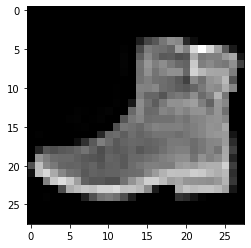

In [80]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted label = {prediction}")
print(f"Actual label = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

now we can build a gradient descent with epochs

In [81]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")



since we have epoch =3, we expect the whole data will be trained 3 times and so have 3 costs

In [82]:
stochastic_gradient_descent(W,B,train_data)

Initial Cost = 1.0357163740628248
0 Cost = 0.12253924643183176
1 Cost = 0.10807919912428347
2 Cost = 0.09973530762867618


we now put everything together in a class.

In [83]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas


  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

  def mini_batch_gradient_descent(self, data, batch_size =15, alpha=0.04, epochs=3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length=len(data)
    for k in range(epochs):
      for j in range(0,data_length-batch_size,batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j+batch_size]:
          A, deltas = self.deltas_dict(p)
          A_list.append(A)

          for i in range(1, self.L):
            self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
            self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")


In [84]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10])

SGD

In [85]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.0870015488769205
2 Cost = 0.10102098319027059


mini batch method

In [86]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.10102098319027059
2 Cost = 0.10102098319027059


check testing error

In [87]:
net.MSE(test_data)

0.1124604508278882

### Add different activation function in the network (add tanh, relu and sigmoid in the function.)

In [88]:
#add tanh, relu and sigmoid in the function.
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10],actFun_type='tanh'):
    self.actFun_type = actFun_type
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def actFun(self, z, type):

      if type == 'tanh':
          return np.tanh(z)
      elif type == 'sigmoid':
          return 1.0 / (1.0 + np.exp(-z))
      elif type == 'relu':
          return np.maximum(0, z)
      else:
          return None

  def diff_actFun(self, z, type):

          # YOU IMPLEMENT YOUR diff_actFun HERE
      if type == 'tanh':
          return 1.0 - (np.tanh(z))**2
      elif type == 'sigmoid':
          return np.exp(z)/(1.0+np.exp(z))**2
      elif type == 'relu':
          return np.where(z > 0, 1.0, 0)
      else:
          return None

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = self.actFun(z, self.actFun_type) #############
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*self.diff_actFun(Z[-1], self.actFun_type)
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) *self.diff_actFun(Z[l], self.actFun_type)

    return A, deltas


  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

  def mini_batch_gradient_descent(self, data, batch_size =15, alpha=0.04, epochs=3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length=len(data)
    for k in range(epochs):
      for j in range(0,data_length-batch_size,batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j+batch_size]:
          A, deltas = self.deltas_dict(p)
          A_list.append(A)

          for i in range(1, self.L):
            self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
            self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

Activation: Tanh

In [89]:
net_tanh = MultilayerPerceptron(layers=[784, 60, 60, 10],actFun_type='tanh')
# net_tanh.stochastic_gradient_descent(train_data)

In [90]:
net_tanh.mini_batch_gradient_descent(train_data)

Initial Cost = 2.0219797056486137
2 Cost = 2.0219797056486137


In [91]:
net_tanh.MSE(test_data)

2.0226435315378692

Activation: Relu

In [92]:
net_relu = MultilayerPerceptron(layers=[784, 100, 100, 10],actFun_type='relu')
# net_relu.stochastic_gradient_descent(train_data)

In [93]:
net_relu.mini_batch_gradient_descent(train_data)

Initial Cost = 1.677351514619462
2 Cost = 1.677351514619462


In [94]:
net_relu.MSE(test_data)

1.6717335353234182

Activation: Sigmoid

In [95]:
net_sig = MultilayerPerceptron(layers=[784, 100, 100, 10],actFun_type='sigmoid')
# net_sig.stochastic_gradient_descent(train_data)

In [96]:
net_sig.mini_batch_gradient_descent(train_data)

Initial Cost = 1.2531857555833366
2 Cost = 1.2531857555833366


In [97]:
net_sig.MSE(test_data)

1.2533420620113405

### Conclusion
In this example, sigmoid activation perfomed the best in term of test error.